In [1]:
from numpy import *
import numpy as np 
def loadData(filename):
    data=open(filename,'r').readlines()
    dataset=[]
    for line in data:
        stringlist = line.strip('\n').split('\t')
        if len(stringlist)>1:
            stringlist[0]=float(stringlist[0])
            stringlist[1]=float(stringlist[1])
            stringlist[2]=float(stringlist[2])
        dataset.append(stringlist)
    return np.array(dataset)
Dataset=loadData('fastmap-data.txt')
word=loadData('fastmap-wordlist.txt')

In [2]:
def find_function(Dataset):
    Farthest= -1
    for items in Dataset:
        if items[2]>Farthest:
            Farthest=items[2]
    for items in Dataset:
        if items[2]==Farthest:
            (oa,ob,d_ab)=(items[0],items[1],Farthest)
            break
    return (oa,ob,d_ab)

In [3]:
def cos(oa,ob,d_ab,Dataset,wordlist):
    dt=list(Dataset)
    wl=list(wordlist)
    dictionary=dict()
    for i in range(len(wl)):
        oi=i+1 #first xi is correct,oi should start from 1 not 0.
        d_ai=0
        d_bi=0
        for d in dt:
            if (d[0]==oa and d[1]==oi) or (d[0]==oi and d[1]==oa):
                d_ai=d[2]
            if (d[0]==ob and d[1]==oi) or (d[0]==oi and d[1]==ob):
                d_bi=d[2]
            if d_ai and d_bi:
                break
        xi=(d_ai**2+d_ab**2-d_bi**2)/(2*d_ab)
        dictionary[i]=xi
    return dictionary  


In [4]:
#update
import math
def update(dictionary,dataset):
    dt=list(dataset)
    for oi in range(1,11):
        for element in dictionary:
            if element+1==oi:#element start from 1
                xi=dictionary[element]
                break
        for oj in range(oi+1,11):
            for element in dictionary:
                if element+1==oj:#element start from 1
                    xj=dictionary[element]
                    break
            #print(dt)
            for d in dt:
                if (d[0]==oi and d[1]==oj) or (d[1]==oi and d[0]==oj):
                    d_old_ij=d[2]
                    d_new_ij=math.pow(abs(d_old_ij**2-(xi-xj)**2),0.5)
                    d[2]=d_new_ij
    return np.array(dt)


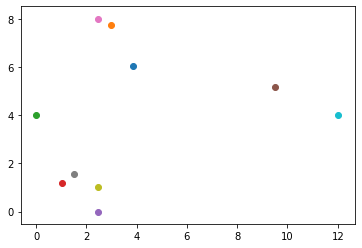

[[3.875, 6.0625],
 [3.0, 7.749999999999999],
 [0.0, 4.0],
 [1.0416666666666667, 1.1875],
 [2.4583333333333335, 0.0],
 [9.5, 5.1875],
 [2.4583333333333335, 8.0],
 [1.5, 1.5624999999999996],
 [2.4583333333333335, 1.0],
 [12.0, 4.0]]

In [5]:
import matplotlib.pyplot as plt
def fastmap(Dataset,word):
    dt=list(Dataset)
    wl=list(word)
    oa,ob,d_ab=find_function(Dataset)
    dictionary=cos(oa,ob,d_ab,Dataset,word)
    return dictionary

def main(Dataset,word):
    dictionary1=fastmap(Dataset,word)
    sub_dataset=update(dictionary1,Dataset)
    dictionary2=fastmap(sub_dataset,word)
    list_2D=list()
    for i in range(len(word)):
        x=dictionary1[i]
        y=dictionary2[i]
        list_2D.append([x,y])
        
    fig, ax = plt.subplots()
    for i in range(10):
        ax.scatter(list_2D[i][0], list_2D[i][1])
    plt.show()
    
    return list_2D
    
main(Dataset,word)   